In [ ]:
Pkg.add("PkgDev")

In [1]:
using Colors #for displaying rules
using Images #for displaying rules
using IterTools #for product() function (Iterate over all combinations in the Cartesian product of the inputs)
using FileIO #for saiving files, if need be

In [ ]:
using PkgDev

In [2]:
#initialize array that will contain 8 possible 3-element binary neighborhoods 
rule_array = Array[]
rule_array1 = Array[] #for making a deepcopy later, back to rule_array
for p in product([0 0.9],[0 0.9],[0 0.9])
    push!(rule_array1, collect(Float64,p))
end


# create an array of arrays to which will be iteratively appended the values from set_array to create an array of all possible rulesets
for i in 1:256
    push!(rule_array, deepcopy(rule_array1)) #deepcopy() creates an independent object
end


# create array of arrays of all possible 8-element binary combinations
set_array = Array[]
for p in product([0 0.9],[0 0.9],[0 0.9],[0 0.9],[0 0.9],[0 0.9],[0 0.9],[0 0.9])
    push!(set_array, collect(Float64,p))
end


# combine set_array with rule_array
for i in 1:256
    for j in 1:8
        push!(rule_array[i][j],1.0) # padding
        push!(rule_array[i][j], set_array[i][j])
        push!(rule_array[i][j],1.0) # padding
    end
end

function rule_view(x)
    array = ones(2,31)
    for i in 1:8
        array[1,(3i+(i-3)):(3i+(i-1))]  = rule_array[x][i][1:3]
        array[2,(3i+(i-3)):(3i+(i-1))] = rule_array[x][i][4:6]
    end
    display(Gray.(array))
end

rule_view (generic function with 1 method)

In [3]:
#function for converting seed value to binary array, and then inserting these values as top center seed
function seeder(seed, W)
    global bin_array = Float64[] #initialize array to push binary values to, setting scope as global
    for char in bin(seed)
        char = convert(Float64, char) - 48 #for ASIIC values
        if char == 1.0
            char = 0.9
        end
        push!(bin_array, char)
    end 
    
    if length(bin_array)%2 == 1 #if it is odd 
        push!(bin_array, 0.9) #add a dead cell to the end of array
    end
    
    if W%2 == 0 #if width of ca_array is even (i.e. no exact middle cell, rather two middle cells)
        for i in 1:(length(bin_array)-1)
            global ca_array[1, convert(Int8, W/2 - (length(bin_array)/2-1) + i)] = bin_array[i+1] #globalize changes to ca_array 
        end
        
    else #if width is odd number (i.e. there is an exact middle cell)
        for i in 1:(length(bin_array)-1)
            global ca_array[1, convert(Int8, (W-1)/2 - (length(bin_array)/2-1) + i)] = bin_array[i+1]
        end
    end
end


function ca_wrap(rule)

    for i in 2:length(ca_array[:,1]) 
        for j in 1:length(ca_array[1,:]) #at left edge
            if j == 1 #for iterating at edges
                edge_array = [ca_array[i-1,length(ca_array[1,:])]] #add the edge cell from end of row (right edge)

                append!(edge_array, ca_array[i-1,j:j+1]) #add two neighbor cells

                for k in 1:8
                    if edge_array[1:3] == rule_array[rule][k][1:3] #see which neighborhood matches
                        global ca_array[i,j] = rule_array[rule][k][5]
                    end
                end
                
            elseif j == length(ca_array[1,:]) #at right edge

                edge_array = ca_array[i-1,j-1:j] #add two neighbor cells
                
                push!(edge_array, ca_array[i-1,1]) #add edge cell from beginning of row (left edge)

                for k in 1:8
                    if edge_array[1:3] == rule_array[rule][k][1:3] #see which neighborhood matches
                        global ca_array[i,j] = rule_array[rule][k][5]
                    end
                end
          
            else
                for k in 1:8
                    if ca_array[i-1,j-1:j+1] == rule_array[rule][k][1:3] #see which neighborhood matches
                        global ca_array[i,j] = rule_array[rule][k][5]
                    end
                end
            end
        end
    end
end


###########
###########


function ca_no_wrap(rule)
    for i in 2:length(ca_array[:,1]) 
        for j in 2:length(ca_array[1,:])-1
            for k in 1:8
                if ca_array[i-1,j-1:j+1] == rule_array[rule][k][1:3] #see which neighborhood matches
                    global ca_array[i,j] = rule_array[rule][k][5]
                end
            end
        end
    end
end


###########
###########


#master function
function ca_maker(L, W, rule, seed; wrap = "True") #default values
    #make sure binary of seed is not wider than dimension of array
    if length(bin(seed)) > W 
        println("Error: The binary value of your chosen seed is wider than the array(W). Please adjust seed and/or W.")
        return
    end
    if W > 242
        println("Error: The maximum width(W) is 242.")
        return
    end
    
    global ca_array = fill(0.9, L, W) #fill array with dead cells (0.9 = light grey = dead)
    
    #bin(seed) <= (width - 2), otherwise should return error w/ explanation (e.g. using print() and then break())
    seeder(seed, W)

    if wrap == "True"
        ca_wrap(rule)
    
    elseif wrap == "False"
        ca_no_wrap(rule)
             
    else
        println("provide boolean value for wrap")
    end
    display(Gray.(ca_array))
end

ca_maker (generic function with 1 method)

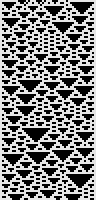

In [4]:
ca_maker(100,48,123,2244331455, wrap = "False")

In [5]:
using PkgDev
PkgDev.generate("CellularAutomata","MIT")

LoadError: [91mArgumentError: Module PkgDev not found in current path.
Run `Pkg.add("PkgDev")` to install the PkgDev package.[39m